Comenzamos importando todas las librerías que necesitaremos.

In [36]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

In [24]:
#Ignoraremos todos los warnings de pandas.
warnings.filterwarnings('ignore')

Carga de fuentes de datos.

In [7]:
df_deptos = pd.read_csv(r'dataframes/venta_deptos_limpio.csv')

Veo que contiene dicho csv.

In [8]:
df_deptos

,urls,precio,calle,altura,metros_totales,metros_cubiertos,ambientes,banios,dormitorios,cocheras
0,/propiedades/clasificado/veclapin-edificio-dep...,46000,Roque-Saenz-Peña,1001.0,58.0,48.0,3,1.0,2.0,NaN
1,/propiedades/clasificado/veclapin-departamento...,179000,Departamento-A-Estrenar-En-Resistencia-2-Dormi...,645.0,85.0,85.0,3,2.0,2.0,1.0
2,/propiedades/clasificado/veclapin-alvear-251-d...,65000,Av-Alvear,251.0,120.0,100.0,5,2.0,3.0,3.0
3,/propiedades/clasificado/veclapin-solar-belgra...,44000,Av-Belgrano,1475.0,49.0,39.0,2,3.0,1.0,NaN
4,/propiedades/clasificado/veclapin-departamento...,38000,Colon,1300.0,40.0,40.0,2,1.0,1.0,NaN
5,/propiedades/clasificado/veclapin-departamento...,125000,Mitre,400.0,82.0,82.0,4,1.0,3.0,1.0
6,/propiedades/clasificado/veclapin-departamento...,85000,Santiago-Del-Estero,500.0,75.0,75.0,3,1.0,2.0,1.0
7,/propiedades/clasificado/veclapin-departamento...,55000,Pellegrini,440.0,54.0,54.0,4,1.0,2.0,NaN
8,/propiedades/clasificado/veclapin-departamento...,23000,Fontana,400.0,42.0,37.0,1,1.0,NaN,NaN
9,/propiedades/clasificado/veclapin-edificio-inc...,65000,Echeverria,250.0,75.0,75.0,4,2.0,1.0,1.0


Cargamos los precios del dólar al día de la fecha.

In [9]:
df_dolarhoy = pd.read_csv(r'dataframes/cotizacion_dolar_hoy_limpio.csv')

In [10]:
df_dolarhoy

,tipo_dolar,valor_compra,valor_venta
0,dolar_blue,1135.0,1155.0
1,dolar_oficial,809.0,849.0
2,dolar_bolsa,1197.6,1203.9
3,contado_con_liqui,1240.1,1246.7
4,dolar_cripto,1196.0,1232.0


Una vez que tenemos el precio de compra de los departamentos y el valor del dólar en el día (dólar blue venta), procedemos a conseguir el precio de los departamentos en pesos argentinos.

In [11]:
#Resguardamos el valor del dólar que está en el DataFrame con los precios.
valor_dolar_blue = df_dolarhoy[df_dolarhoy['tipo_dolar'] == 'dolar_blue']['valor_venta'].values[0]

In [13]:
#Ahora si, agregamos la columna 'precio en pesos' al DataFrame de departamentos realizando la simple multiplicación precio por valor del dólar.
df_deptos['precio_en_pesos'] = df_deptos['precio'] * valor_dolar_blue

In [14]:
#Verificamos que la nueva columna esté.
df_deptos.head()

,urls,precio,calle,altura,metros_totales,metros_cubiertos,ambientes,banios,dormitorios,cocheras,precio_en_pesos
0,/propiedades/clasificado/veclapin-edificio-dep...,46000,Roque-Saenz-Peña,1001.0,58.0,48.0,3,1.0,2.0,NaN,53130000.0
1,/propiedades/clasificado/veclapin-departamento...,179000,Departamento-A-Estrenar-En-Resistencia-2-Dormi...,645.0,85.0,85.0,3,2.0,2.0,1.0,206745000.0
2,/propiedades/clasificado/veclapin-alvear-251-d...,65000,Av-Alvear,251.0,120.0,100.0,5,2.0,3.0,3.0,75075000.0
3,/propiedades/clasificado/veclapin-solar-belgra...,44000,Av-Belgrano,1475.0,49.0,39.0,2,3.0,1.0,NaN,50820000.0
4,/propiedades/clasificado/veclapin-departamento...,38000,Colon,1300.0,40.0,40.0,2,1.0,1.0,NaN,43890000.0


In [16]:
#Reacomodamos el DataFrame para que ambas columnas de precio estén una al lado de la otra para lograr una comparación más fácil.
columnas = df_deptos.columns.tolist()
indice_precio = columnas.index('precio')
columnas.insert(indice_precio + 1, columnas.pop(columnas.index('precio_en_pesos')))
df_deptos = df_deptos[columnas]

#Verificamos que se haya reordenado el DataFrame.
df_deptos.head()

,urls,precio,precio_en_pesos,calle,altura,metros_totales,metros_cubiertos,ambientes,banios,dormitorios,cocheras
0,/propiedades/clasificado/veclapin-edificio-dep...,46000,53130000.0,Roque-Saenz-Peña,1001.0,58.0,48.0,3,1.0,2.0,NaN
1,/propiedades/clasificado/veclapin-departamento...,179000,206745000.0,Departamento-A-Estrenar-En-Resistencia-2-Dormi...,645.0,85.0,85.0,3,2.0,2.0,1.0
2,/propiedades/clasificado/veclapin-alvear-251-d...,65000,75075000.0,Av-Alvear,251.0,120.0,100.0,5,2.0,3.0,3.0
3,/propiedades/clasificado/veclapin-solar-belgra...,44000,50820000.0,Av-Belgrano,1475.0,49.0,39.0,2,3.0,1.0,NaN
4,/propiedades/clasificado/veclapin-departamento...,38000,43890000.0,Colon,1300.0,40.0,40.0,2,1.0,1.0,NaN


Ahora que tenemos las columnas que creemos que vamos a necesitar, tomamos un resumen de los datos que contiene.

In [21]:
cantidad_elementos = df_deptos.size
cantidad_nulos_por_columna = df_deptos.isnull().sum()
tipos_de_dato_por_columna = df_deptos.dtypes
descripcion_estadistica = df_deptos.describe()

print("Cantidad de elementos en el DataFrame:", cantidad_elementos)
print("\nCantidad de valores nulos por columna:")
print(cantidad_nulos_por_columna)
print("\nTipo de dato en cada columna:")
print(tipos_de_dato_por_columna)
print("\nDescripción estadística del DataFrame:")
print(descripcion_estadistica)

Cantidad de elementos en el DataFrame: 385

Cantidad de valores nulos por columna:
urls                 0
precio               0
precio_en_pesos      0
calle                0
altura               2
metros_totales       1
metros_cubiertos     2
ambientes            0
banios               1
dormitorios          4
cocheras            18
dtype: int64

Tipo de dato en cada columna:
urls                 object
precio                int64
precio_en_pesos     float64
calle                object
altura              float64
metros_totales      float64
metros_cubiertos    float64
ambientes             int64
banios              float64
dormitorios         float64
cocheras            float64
dtype: object

Descripción estadística del DataFrame:
              precio  precio_en_pesos       altura  metros_totales  \
count      35.000000     3.500000e+01    33.000000       34.000000   
mean    80200.000000     9.263100e+07   681.969697       72.705882   
std     55988.339122     6.466653e+07   411.5403

Habiendo obtenido detalles de nuestros datos, podemos realizar una limpieza de los mismos.

In [25]:
#Las columnas 'metros_totales' y 'metros_cubiertos' tienen valores nulos que son relevantes a la hora de comprar un departamento, por lo que descartamos dichas filas para no tenerlas en cuenta.
df_deptos = df_deptos.dropna(subset=['metros_totales', 'metros_cubiertos'])

#Como son departamentos, estos también pueden ser usados para el comercio, por lo que no necesariamente tienen baños o dormitorios. Por esto, reemplazaremos los valores nulos de dichas columnas por 0.
df_deptos['banios'] = df_deptos['banios'].fillna(0)
df_deptos['dormitorios'] = df_deptos['dormitorios'].fillna(0)

#También, los departamentos pueden no tener cochera, entonces reemplazamos esos valores nulos por 0.
df_deptos['cocheras'] = df_deptos['cocheras'].fillna(0)

In [26]:
#Aún nos queda ver qué ocurre con la columna 'altura' que tiene valores nulos, por lo que traemos esas filas.
df_deptos[df_deptos['altura'].isnull()]

,urls,precio,precio_en_pesos,calle,altura,metros_totales,metros_cubiertos,ambientes,banios,dormitorios,cocheras
28,/propiedades/clasificado/veclapin-edificio-poo...,43000,49665000.0,Av-Castelli-,NaN,60.0,40.0,2,1.0,1.0,0.0
30,/propiedades/clasificado/veclapin-solar-rioja-...,120000,138600000.0,La-Rioja,NaN,90.0,80.0,3,1.0,2.0,0.0


In [27]:
#Como se puede ver, no están las direcciones de estos departamentos. Como nos interesan saber todos los datos de cada departamento, estos no sirven por lo que procedemos a dropear estas filas.
df_deptos = df_deptos.dropna(subset=['altura'])

In [29]:
#Un último chequeo de que ya no queden valores nulos.
cantidad_nulos_por_columna = df_deptos.isnull().sum()
print("\nCantidad de valores nulos por columna:")
print(cantidad_nulos_por_columna)


Cantidad de valores nulos por columna:
urls                0
precio              0
precio_en_pesos     0
calle               0
altura              0
metros_totales      0
metros_cubiertos    0
ambientes           0
banios              0
dormitorios         0
cocheras            0
dtype: int64


In [31]:
#Repasando un poco los tipos de datos, las columnas de altura, baños, dormitorios y cocheras están en tipo real cuando es mejor tenerlas en enteros. Realizamos esa formalización.
df_deptos['altura'] = df_deptos['altura'].astype(int)
df_deptos['banios'] = df_deptos['banios'].astype(int)
df_deptos['dormitorios'] = df_deptos['dormitorios'].astype(int)
df_deptos['cocheras'] = df_deptos['cocheras'].astype(int)

df_deptos.head()

,urls,precio,precio_en_pesos,calle,altura,metros_totales,metros_cubiertos,ambientes,banios,dormitorios,cocheras
0,/propiedades/clasificado/veclapin-edificio-dep...,46000,53130000.0,Roque-Saenz-Peña,1001,58.0,48.0,3,1,2,0
1,/propiedades/clasificado/veclapin-departamento...,179000,206745000.0,Departamento-A-Estrenar-En-Resistencia-2-Dormi...,645,85.0,85.0,3,2,2,1
2,/propiedades/clasificado/veclapin-alvear-251-d...,65000,75075000.0,Av-Alvear,251,120.0,100.0,5,2,3,3
3,/propiedades/clasificado/veclapin-solar-belgra...,44000,50820000.0,Av-Belgrano,1475,49.0,39.0,2,3,1,0
4,/propiedades/clasificado/veclapin-departamento...,38000,43890000.0,Colon,1300,40.0,40.0,2,1,1,0


Gráficos de datos.

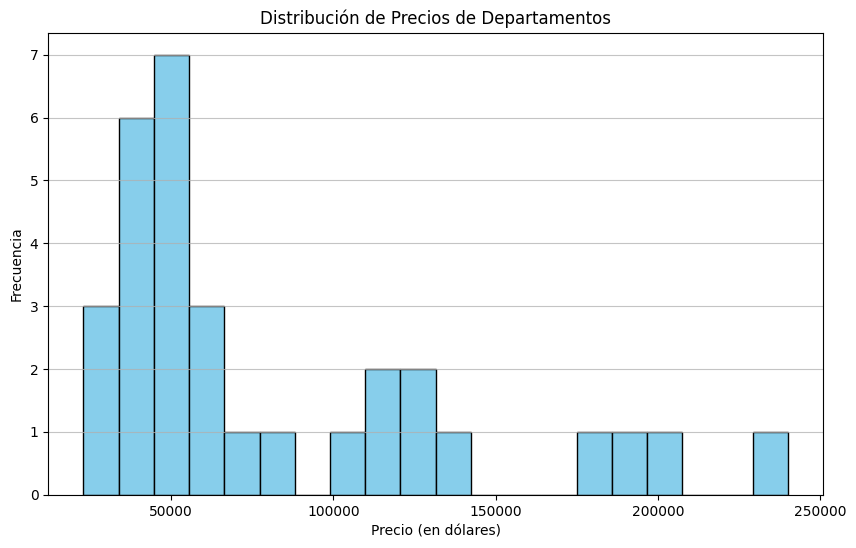

In [33]:
#Histograma de precios

plt.figure(figsize=(10, 6))
plt.hist(df_deptos['precio'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Precios de Departamentos')
plt.xlabel('Precio (en dólares)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

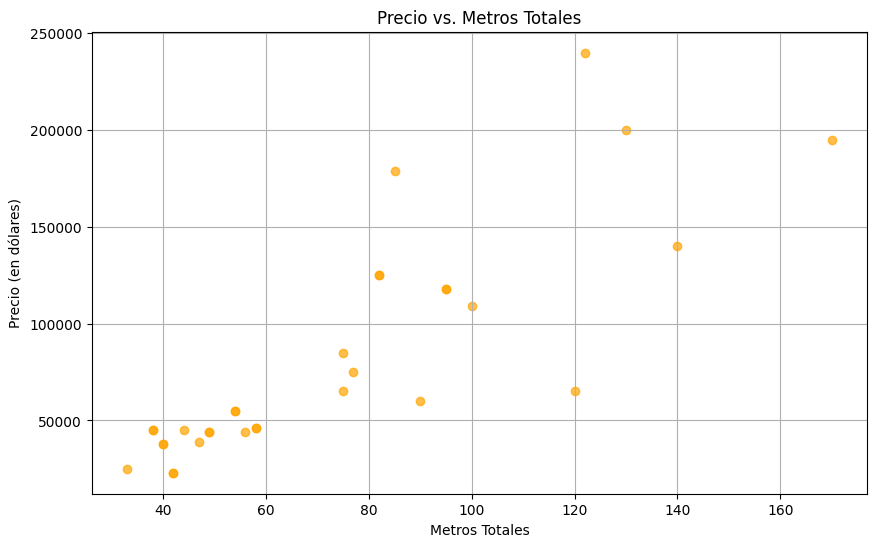

In [34]:
#Gráfico de dispersión.

plt.figure(figsize=(10, 6))
plt.scatter(df_deptos['metros_totales'], df_deptos['precio'], alpha=0.7, color='orange')
plt.title('Precio vs. Metros Totales')
plt.xlabel('Metros Totales')
plt.ylabel('Precio (en dólares)')
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

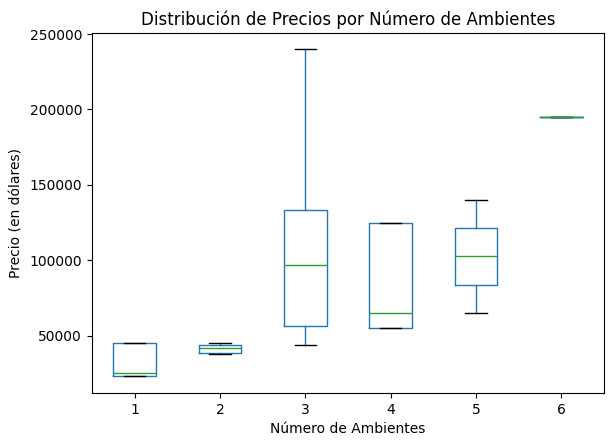

In [35]:
#Boxplot de Precios por Número de Ambientes.

plt.figure(figsize=(10, 6))
df_deptos.boxplot(column='precio', by='ambientes', grid=False)
plt.title('Distribución de Precios por Número de Ambientes')
plt.suptitle('')
plt.xlabel('Número de Ambientes')
plt.ylabel('Precio (en dólares)')
plt.show()

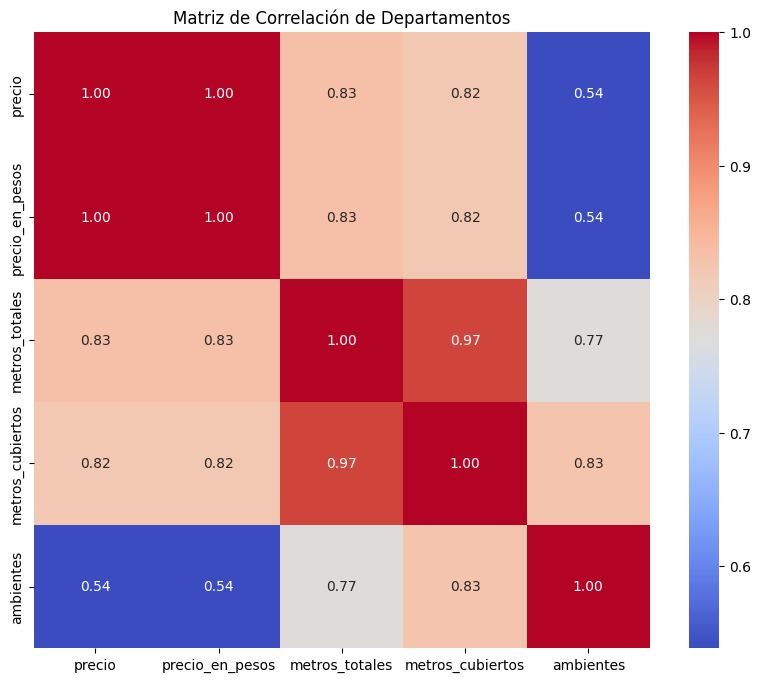

In [38]:
#Matriz de correlación.

#Seleccionamos solo las columnas numéricas.
numeric_df = df_deptos.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Matriz de Correlación de Departamentos')
plt.show()